In [22]:
import torch
import random
from datasets import load_dataset
from sklearn.metrics import accuracy_score
from transformers import AutoModelForCausalLM, AutoTokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix





In [4]:
if torch.cuda.is_available():
    device = "cuda"

print(device)

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True).to(device)
tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-2", trust_remote_code=True)


cuda


A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-2:
- configuration_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/phi-2:
- modeling_phi.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
dataset = load_dataset("financial_phrasebank", 'sentences_allagree')
dataset = dataset['train']


In [6]:
random.seed(10)
sampled_indices = random.sample(range(len(dataset)), len(dataset))
sampled_data = [dataset[i] for i in sampled_indices]

sampled_sentences = [data['sentence'] for data in sampled_data]
sampled_labels = [data['label'] for data in sampled_data]


In [48]:
prompt = "Instruct: As a Financial News Article Sentiment Classification expert, analyze and classify the sentiment of the following news article as a single number, 0 being 'Negative', 1 being 'Neutral', and 2 being 'Positive'. Provide only a single number as output, without additional text. Below is a sentiment classification example:\n Example: 'Operating margin , however , slipped to 14.4 % from 15.1 % , dragged down by a poor performance in enterprise solutions .' - Output:0 \n Example: 'The negotiations concern personnel of Cencorp Corporation and Singulase Oy as whole in Finland and in Sweden , the company said .' - Output:1 \n Example: 'In January-September 2009 , the Group 's net interest income increased to EUR 112.4 mn from EUR 74.3 mn in January-September 2008 .' - Output:2 \n Sentiment Classification news article: "


In [49]:
predictions = []

for sentence in sampled_sentences:
    inputs = tokenizer([prompt + "'" + sentence + "' \n Output:"], return_tensors="pt", return_attention_mask=False).to(device)
    outputs = model.generate(**inputs, max_new_tokens=1, pad_token_id=model.config.eos_token_id)
    text = tokenizer.batch_decode(outputs)
    predictions.append(int(text[-1][-1]))



In [50]:
accuracy = accuracy_score(sampled_labels, predictions)
print(accuracy)

0.38515901060070673


In [51]:
conf_matrix = confusion_matrix(sampled_labels, predictions)

# Compute precision, recall, and F1 score
precision = precision_score(sampled_labels, predictions, average = None)
recall = recall_score(sampled_labels, predictions, average = None)
f1 = f1_score(sampled_labels, predictions, average = None)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: [0.34246575 0.94594595 0.38203957]
Recall: [0.99009901 0.05032351 0.88070175]
F1 Score: [0.50890585 0.09556314 0.5329087 ]


In [52]:
conf_matrix

array([[300,   0,   3],
       [512,  70, 809],
       [ 64,   4, 502]], dtype=int64)

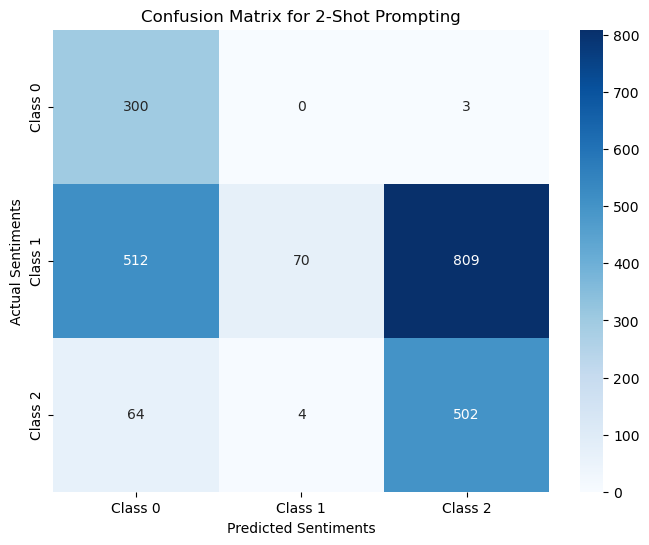

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Sentiments')
plt.ylabel('Actual Sentiments')
plt.title('Confusion Matrix for 2-Shot Prompting')
plt.show()
